In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Indonesia_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,Density,No of country,Population
0,1991,NaN,848,101.91,5,3156
1,1992,NaN,908,103.65,6,3530
2,1993,NaN,1013,105.36,3,2402
3,1994,NaN,1116,107.06,1,97
4,1995,NaN,1254,108.72,1,19


In [4]:
#statistics of dataset
df.describe()

,Year,GPI,GDP,Density,No of country,Population
count,26.000000,9.000000,26.000000,26.000000,26.000000,26.000000
mean,2003.500000,1.871111,1897.653846,122.700385,14.730769,16859.307692
std,7.648529,0.067211,1119.898743,12.774916,11.442229,40368.950311
min,1991.000000,1.768000,572.000000,101.910000,1.000000,19.000000
25%,1997.250000,1.843000,1005.500000,112.380000,7.750000,185.000000
50%,2003.500000,1.860000,1351.000000,122.430000,12.500000,908.500000
75%,2009.750000,1.913000,2999.750000,132.935000,16.000000,6259.250000
max,2016.000000,1.979000,3745.000000,144.100000,48.000000,162506.000000


In [5]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year              0
GPI              17
GDP               0
Density           0
No of country     0
Population        0
dtype: int64

In [6]:
#fill missing values
l = df['GPI'].mean()
df['GPI'].fillna(l,inplace = True)

In [7]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
Density          0
No of country    0
Population       0
dtype: int64

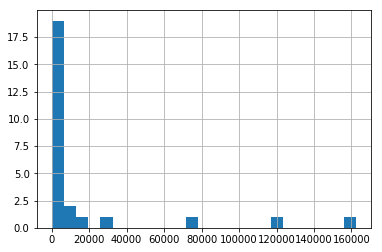

In [8]:
#check population histogram
df['Population'].hist(bins=25)

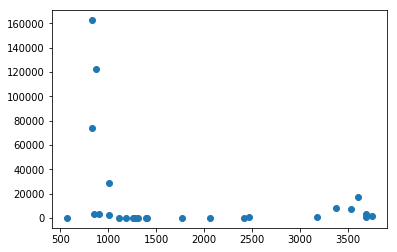

In [9]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

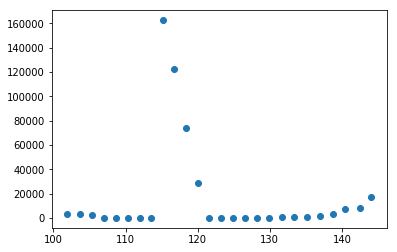

In [10]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

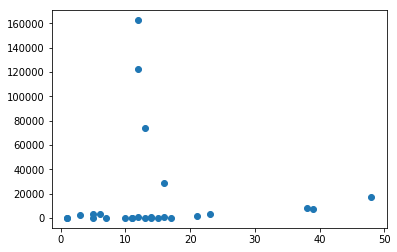

In [11]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

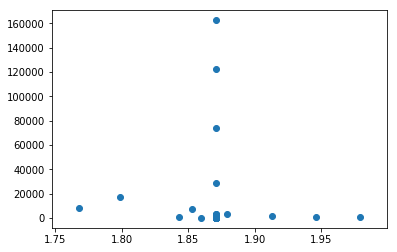

In [12]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [13]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  37851.3130507
Coefficient:  [-11.06208353]
R squared value:  0.0941751819611


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  16796.9745949
Coefficient:  [ 4.23148964]
R squared value:  1.43851023815e-06


In [15]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  69576.0270859
Coefficient:  [-429.63776812]
R squared value:  0.0184852823461


In [16]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  119817.971776
Coefficient:  [-55025.41429669]
R squared value:  0.00268575575897


In [17]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  59013.5481132
MAE Score:  33113.8619861
MSE Score:  3482598860.91
R squared value:  0.139411593007


In [18]:
# include 3 key variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  60989.8462805
MAE Score:  34414.4490933
MSE Score:  3719761349.31
R squared value:  0.0797834449069


In [19]:
# include all variables to build a model
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  62205.1907834
MAE Score:  34366.9696431
MSE Score:  3869485760.4
R squared value:  0.0374458101643


In [20]:
# include GDP to build a model
X = df[['GDP']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  64167.4871945
MAE Score:  35832.9695632
MSE Score:  4117466412.86
R squared value:  -0.0317647276851


In [21]:
# include Density to build a model
X = df[['Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  65625.1730854
MAE Score:  35031.6588006
MSE Score:  4306663342.49
R squared value:  -0.0769053439221


In [22]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.771081124132
Predicted GDP for year:  2017 [[ 3804.12099359]]
Predicted GDP for year:  2018 [[ 3939.43656517]]
Predicted GDP for year:  2019 [[ 4074.75213675]]
Predicted GDP for year:  2020 [[ 4210.06770833]]
Predicted GDP for year:  2021 [[ 4345.38327991]]
Predicted GDP for year:  2022 [[ 4480.6988515]]


array([[ 3668.80542201]])

In [23]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.999584893147
Predicted Density for year:  2017 [[ 145.14969952]]
Predicted Density for year:  2018 [[ 146.81305489]]
Predicted Density for year:  2019 [[ 148.47641026]]
Predicted Density for year:  2020 [[ 150.13976563]]
Predicted Density for year:  2021 [[ 151.80312099]]
Predicted Density for year:  2022 [[ 153.46647636]]


array([[ 143.48634415]])

In [24]:
#predict the No of country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)    

R squared value:  0.662013533
Predicted No of country for year:  2017 [[ 29.01121795]]
Predicted No of country for year:  2018 [[ 30.21928419]]
Predicted No of country for year:  2019 [[ 31.42735043]]
Predicted No of country for year:  2020 [[ 32.63541667]]
Predicted No of country for year:  2021 [[ 33.84348291]]
Predicted No of country for year:  2022 [[ 35.05154915]]


array([[ 27.80315171]])

In [25]:
#predict the GPI for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GPI']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_GPI = [0,0,0,0,0,0]
for i in range (0,6):
    pred_GPI[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GPI for year: ",(2017+i),pred_GPI[i])
lm2.predict(2016)    

R squared value:  -0.0774310718491
Predicted GPI for year:  2017 [[ 1.88665376]]
Predicted GPI for year:  2018 [[ 1.88729791]]
Predicted GPI for year:  2019 [[ 1.88794207]]
Predicted GPI for year:  2020 [[ 1.88858623]]
Predicted GPI for year:  2021 [[ 1.88923038]]
Predicted GPI for year:  2022 [[ 1.88987454]]


array([[ 1.8860096]])

In [26]:
# Forecasted Population of Indonesia
X = df[['GDP', 'Density','No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
  
    
var_2017 = [[3804.12099359,145.14969952,29.01121795,1.88665376]]
var_2018 = [[3939.43656517,146.81305489,30.21928419,1.88729791]]
var_2019 = [[4074.75213675,148.47641026,31.42735043,1.88794207]]                               
var_2020 = [[4210.06770833,150.13976563,32.63541667,1.88858623]]
var_2021 = [[4345.38327991,151.80312099,33.84348291,1.88923038]]
var_2022 = [[4480.6988515,153.46647636,35.05154915,1.88987454]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))

var_2016= [[3668.80542201,143.48634415,27.80315171,1.8860096]]
lm2.predict(var_2016)

Predicted Population for year 2017:  [ 6332.3647025]
Predicted Population for year 2018:  [ 6358.41406431]
Predicted Population for year 2019:  [ 6384.4650291]
Predicted Population for year 2020:  [ 6410.51599388]
Predicted Population for year 2021:  [ 6436.56535349]
Predicted Population for year 2022:  [ 6462.61631812]


array([ 6306.31373772])

In [27]:
# Forecasted Population of Indonesia
X = df[['GDP', 'Density','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
  
    
var_2017 = [[3804.12099359,145.14969952,29.01121795]]
var_2018 = [[3939.43656517,146.81305489,30.21928419]]
var_2019 = [[4074.75213675,148.47641026,31.42735043]]                               
var_2020 = [[4210.06770833,150.13976563,32.63541667]]
var_2021 = [[4345.38327991,151.80312099,33.84348291]]
var_2022 = [[4480.6988515,153.46647636,35.05154915]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))

var_2016= [[3668.80542201,143.48634415,27.80315171]]
lm2.predict(var_2016)

Predicted Population for year 2017:  [ 6317.97604536]
Predicted Population for year 2018:  [ 6342.92466242]
Predicted Population for year 2019:  [ 6367.87327947]
Predicted Population for year 2020:  [ 6392.82189652]
Predicted Population for year 2021:  [ 6417.77051]
Predicted Population for year 2022:  [ 6442.71912694]


array([ 6293.02742831])